In [2]:
import numpy as np  # import numpy package (abbreviation stands for Numerical Python)
import matplotlib.pyplot as plt  # we plot graphs with this library
from numba import njit, jit

from matplotlib import cm
import matplotlib as mpl

from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, FixedLocator

fname = 'eps.txt'
eps = np.loadtxt(fname, delimiter='\t', dtype=np.float64, skiprows=1)

wavelengths = eps[:, 0]

ST = eps[:, 1:].T  # ST is a matrix of n x w

path = r"C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\Projects\2019-Bilirubin project\UV-VIS\QY measurement\Photodiode\new setup"

data_led = np.loadtxt(path + r'\LED sources.txt', delimiter='\t', skiprows=1)

LED_355 = data_led[:, 1] / np.trapz(data_led[:, 1], x=wavelengths)
LED_375 = data_led[:, 2] / np.trapz(data_led[:, 2], x=wavelengths)
LED_405 = data_led[:, 3] / np.trapz(data_led[:, 3], x=wavelengths)
LED_420 = data_led[:, 4] / np.trapz(data_led[:, 4], x=wavelengths)
LED_450 = data_led[:, 5] / np.trapz(data_led[:, 5], x=wavelengths)
LED_470 = data_led[:, 6] / np.trapz(data_led[:, 6], x=wavelengths)
LED_490 = data_led[:, 7] / np.trapz(data_led[:, 7], x=wavelengths)


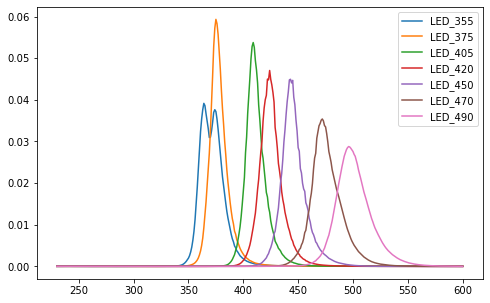

In [3]:
plt.rcParams['figure.figsize'] = [8, 5]
# I_source = I_source_sweep(210, wavelengths)
# I_source /= np.trapz(I_source)
plt.plot(wavelengths, np.asarray([LED_355, LED_375, LED_405, LED_420, LED_450, LED_470, LED_490]).T)
plt.legend("LED_355, LED_375, LED_405, LED_420, LED_450, LED_470, LED_490".split(", "))
plt.show()

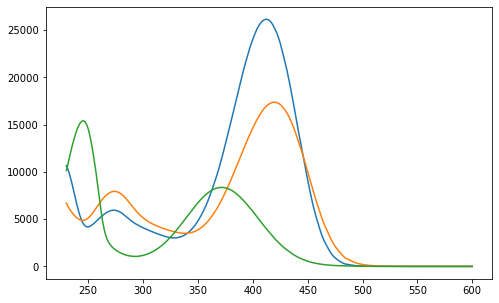

In [3]:


plt.plot(wavelengths, ST.T)
plt.show()



c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide


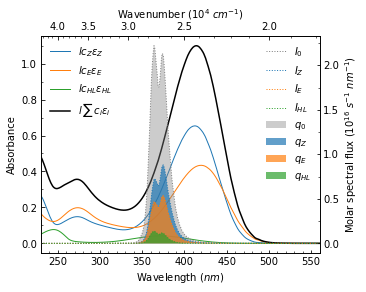

In [7]:
c = np.asarray([2.5e-5, 2.5e-5, 0.5e-5])
# c *= 2

prop_cycle =  plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
# print(type(colors[0]))

# colors = ['blue', 'orange', 'green']
# colors = _colors[]

labels_ec = ['$lc_Z\\varepsilon_Z$', '$lc_E\\varepsilon_E$', '$lc_{HL}\\varepsilon_{HL}$']
labels_qs = ['$q_Z$', '$q_E$', '$q_{HL}$']
labels_Is = ['$I_Z$', '$I_E$', '$I_{HL}$']

Ap = c[:, None] * ST[:3]

A = Ap.sum(0)

MAJOR_TICK_DIRECTION = 'in'  # in, out or inout
MINOR_TICK_DIRECTION = 'in'


def setup_twin_x_axis(ax, y_label="Molar spectral flux ($10^{16}\\ s^{-1}\\ nm^{-1}$)", 
                      x_label=None, ylim=(None, None), major_locator=None, minor_locator=None,
                      keep_zero_aligned=True):
    ax2 = ax.twinx()
    
    ax2.tick_params(which='major', direction=MAJOR_TICK_DIRECTION)
    ax2.tick_params(which='minor', direction=MINOR_TICK_DIRECTION)
    
    if major_locator:
        ax2.yaxis.set_major_locator(major_locator)
        
    if minor_locator:
        ax2.yaxis.set_minor_locator(minor_locator)

    ax2.set_ylabel(y_label)
    if ylim[0] is not None:
        ax2.set_ylim(ylim)
        
    return ax2

def setup_wavenumber_axis(ax, x_label="Wavenumber ($10^{4}\\ cm^{-1}$)", 
                          major_locator=None, minor_locator=AutoMinorLocator(5), factor=1e3):
    
    secondary_ax = ax.secondary_xaxis('top', functions=(lambda x: factor/x, lambda x: 1/(factor * x)))
    
    secondary_ax.tick_params(which='major', direction=MAJOR_TICK_DIRECTION)
    secondary_ax.tick_params(which='minor', direction=MINOR_TICK_DIRECTION)
    
    if major_locator:
        secondary_ax.xaxis.set_major_locator(major_locator)
        
    if minor_locator:
        secondary_ax.xaxis.set_minor_locator(minor_locator)
        
    secondary_ax.set_xlabel(x_label)
        
    return secondary_ax



plt.rcParams['figure.figsize'] = [5, 4]


ax1 = plt.subplot(111)

for i in range(len(Ap)):
    _ = plt.plot(wavelengths, Ap[i], ls="-", lw=1, color=colors[i], label=labels_ec[i])
tot_A = plt.plot(wavelengths, A, color='black', label='$l\,\\sum\,c_i\\varepsilon_i$')

ax1.set_ylabel('Absorbance')
ax1.set_xlabel('Wavelength ($nm$)')
ax1.set_xlim(230, 560)

ax1.legend(loc='upper left', frameon=False)
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(which='major', direction=MAJOR_TICK_DIRECTION)
ax1.tick_params(which='minor', direction=MINOR_TICK_DIRECTION)

# ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

Na = 6.02214086e23
y = Na * 3.686e-8 * LED_355 / LED_355.max() * 1e-16
# I0 = plt.plot(wavelengths, y, color='black', ls='--')

ax2 = setup_twin_x_axis(ax1, minor_locator=AutoMinorLocator(2))


ax2.fill(wavelengths, y, facecolor='gray', alpha=0.4, label='$q_0$')
ax2.plot(wavelengths, y, color='gray', ls='dotted', lw=1, label='$I_0$')


I = y * Ap / A * (1 - 10 ** (-A))


for i in range(len(I)):
    _ = ax2.fill(wavelengths, I[i], alpha=0.7, facecolor=colors[i], label=labels_qs[i])
    _ = ax2.plot(wavelengths, I[i], ls='dotted', alpha=1, lw=1, color=colors[i], label=labels_Is[i])
    
# _ = plt.plot(wavelengths, I.sum(0), color='black', ls=':', label='$l\,\\sum\,I_i$')


# # ax2.set_ylim(None, y_irr.max()*3.5)
# ax2.tick_params(which='both', direction='in')
# # ax2.yaxis.set_major_locator(AutoMinorLocator(2))
# ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
# # https://en.wikipedia.org/wiki/Radiant_flux
# ax2.set_ylabel("Spectral flux ($10^{16}\\ s^{-1}\\ nm^{-1}$)")

ax2.legend(frameon=False)

secax = setup_wavenumber_axis(ax1)


# secax = ax1.secondary_xaxis('top', functions=(lambda x: 1e3/x, lambda x: 1e-3/x))

# secax.tick_params(which='both', direction='in')
# secax.set_xlabel('Wavenumber ($10^{4}\\ cm^{-1}$)')
# secax.xaxis.set_minor_locator(AutoMinorLocator(5))


ax1.set_axisbelow(False)
ax2.set_axisbelow(False)
secax.set_axisbelow(False)



# plt.savefig('model_plot.svg', dpi=500, bbox_inches='tight')
# plt.savefig('model_plot.pdf', dpi=500, format='pdf')

plt.show()

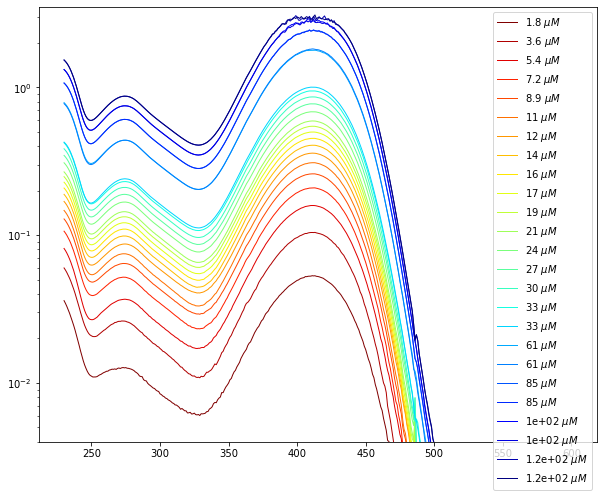

In [100]:
fname = r'C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\Projects\2019-Bilirubin project\UV-VIS\Z epsilon\combined.txt'
data = np.genfromtxt(fname, delimiter='\t', dtype=np.float64)

wls = data[1:, 0]
c = data[0, 1:]

M = data[1:, 1:]

plt.rcParams['figure.figsize'] = [10, 8]

cmap = cm.get_cmap('jet_r', M.shape[1])

for i in range(M.shape[1]):
    plt.semilogy(wls, M[:, i], color=cmap(i), lw=1, label=f"{c[i]*1e6:.2g} $\mu M$")

plt.ylim(4e-3, 3.5)
plt.legend()
plt.show()
